In [1]:
import os
import pandas as pd
from CoefPlot import CoefPlot
from scipy.stats import t
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import os

In [2]:
current_folder = globals()['_dh'][0]
rootdir = os.path.dirname(os.path.dirname(current_folder))
wdir = os.path.join(rootdir, '_2_intermediate', 'data')
outdir = os.path.join(rootdir, '_3_figures_tables', 'data')

In [3]:
df = pd.read_csv(os.path.join(wdir, '_dist_level_correlates_results.csv'))
df['rhs'] = df.variable
del df['variable']

In [4]:
df = df[(df.rhs!='slavery (Nunn)') &
        (df.rhs!='log(elevation)') &
        (df.rhs!='migrant share') &
        (df.rhs!='ethnic fragmentation') & 
        (df.rhs!='ethnic polarization') & 
        (df.rhs!='religious polarization wt') &
        (df.rhs!='religious fragmentation wt') & 
        (df.rhs!='religion-population-share wt') & 
        (df.rhs!='religious polarization n3') &
        (df.rhs!='religious fragmentation n3') & 
        (df.rhs!='religion-population-share n3') & 
        (df.rhs!='religious polarization n') &
        (df.rhs!='religious fragmentation n') & 
        (df.rhs!='religion-population-share n') &
        (df.rhs!='religious polarization wt3')].reset_index(drop=True).copy(deep=True)

In [5]:
def rename_rhs(varlevel):
    
    rnd = {}
    rnd['oil field dummy'] = 'oil dummy'
    rnd['diamond mine dummy'] = 'diamond dummy'
    rnd['log(distance to capital)'] = 'ln(distance to capital)'
    rnd['log(distance to coast)'] = 'ln(distance to coast)'
    rnd['log(distance to national border)'] = 'ln(distance to border)'
    rnd['log(agricultural suitability)'] = 'agricultural suitability'
    rnd['log(stability of malaria transmission)'] = 'stability of malaria'
    rnd['log(terrain ruggedness)'] = 'terrain ruggedness'
    rnd['HYDE population density in 1950'] = 'ln(population density 1950)'
    rnd['log(distance to closest colonial railroad)'] = 'ln(distance to railroad)'
    rnd['log(distance to closest improved or better road in 1960)'] = 'ln(distance to road)'
    rnd['log(distance to closest Catholic mission (Nunn only))'] = 'ln(distance to catholic mission)'
    rnd['log(distance to closest Protestant mission)'] = 'ln(distance to protestant mission)'
    rnd['log(distance to closest precolonial empire (Besley and Reynal-Querol))'] = 'ln(distance to pre-colonial empire)'
    rnd['log(distance to closest precolonial state (Murdock))'] = 'ln(distance to pre-colonial state)'
    rnd['urban share'] = 'urban share (born < 1960)'
    rnd['agricultural labour share'] = 'agr e-share (born < 1960)'
    rnd['manufacturing + services labour share'] = 'man + ser empl-shr (born < 1960)'
    rnd['religious fragmentation'] = 'religious fragmentation'
    rnd['population share christian'] = 'christian population share'
    rnd['population share muslim'] = 'muslim population share'
    rnd['population share traditional'] = 'traditional population share'
    
    return rnd[varlevel]

def assign_grouping(varlevel):
    
    gd = {}
    gd['oil dummy'] = 'geography'
    gd['diamond dummy'] = 'geography'
    gd['ln(distance to capital)'] = 'geography'
    gd['ln(distance to border)'] = 'geography'
    gd['ln(distance to coast)'] = 'geography'
    gd['agricultural suitability'] = 'geography'
    gd['stability of malaria'] = 'geography'
    gd['terrain ruggedness'] = 'geography'
    gd['ln(population density 1950)'] = 'contemporary'
    gd['ln(distance to railroad)'] = 'history'
    gd['ln(distance to road)'] = 'history'
    gd['ln(distance to catholic mission)'] = 'history'
    gd['ln(distance to protestant mission)'] = 'history'
    gd['ln(distance to pre-colonial empire)'] = 'history'
    gd['ln(distance to pre-colonial state)'] = 'history'
    gd['urban share (born < 1960)'] = 'contemporary'
    gd['agr e-share (born < 1960)'] = 'contemporary'
    gd['man + ser empl-shr (born < 1960)'] = 'contemporary'
    gd['religious fragmentation'] = 'religious\ncomposition'
    gd['christian population share'] = 'religious\ncomposition'
    gd['muslim population share'] = 'religious\ncomposition'
    gd['traditional population share'] = 'religious\ncomposition'
    
    return gd[varlevel]
    
def assign_order(varlevel):
    
    ordr = {}
    ordr['oil dummy'] = 11
    ordr['diamond dummy'] = 12
    ordr['ln(distance to capital)'] = 5
    ordr['ln(distance to border)'] = 6
    ordr['ln(distance to coast)'] = 7
    ordr['agricultural suitability'] = 9
    ordr['stability of malaria'] = 8
    ordr['terrain ruggedness'] = 10
    ordr['ln(population density 1950)'] = 1
    ordr['ln(distance to railroad)'] = 13
    ordr['ln(distance to road)'] = 14
    ordr['ln(distance to catholic mission)'] = 15
    ordr['ln(distance to protestant mission)'] = 16
    ordr['ln(distance to pre-colonial empire)'] = 17
    ordr['ln(distance to pre-colonial state)'] = 18
    ordr['urban share (born < 1960)'] = 2
    ordr['agr e-share (born < 1960)'] = 3
    ordr['man + ser empl-shr (born < 1960)'] = 4
    ordr['religious fragmentation'] = 22
    ordr['christian population share'] = 19
    ordr['muslim population share'] = 20
    ordr['traditional population share'] = 21
    
    return ordr[varlevel]

In [6]:
df['rhs'] = df.apply(lambda x: rename_rhs(x['rhs']), axis=1)
df['grouping'] = df.apply(lambda x: assign_grouping(x['rhs']), axis=1)
df['ordr'] = df.apply(lambda x: assign_order(x['rhs']), axis=1)
df['err_t'] = df.se*t.ppf(0.975, df.N)

dfn_c = df[df.majrel=='Christian'][['lito', 'min10', 'direction', 'rhs', 'N']].reset_index(drop=True).copy()
dfn_m = df[df.majrel=='Muslim'][['lito', 'min10', 'direction', 'rhs', 'N']].reset_index(drop=True).copy()
dfn_t = df[df.majrel=='Traditional'][['lito', 'min10', 'direction', 'rhs', 'N']].reset_index(drop=True).copy()
dfn_c.columns = ['lito', 'min10', 'direction', 'rhs', 'Nc']
dfn_m.columns = ['lito', 'min10', 'direction', 'rhs', 'Nm']
dfn_t.columns = ['lito', 'min10', 'direction', 'rhs', 'Nt']

df = pd.merge(df, dfn_c, on=['lito', 'min10', 'direction', 'rhs'], how='left')
df = pd.merge(df, dfn_m, on=['lito', 'min10', 'direction', 'rhs'], how='left')
df = pd.merge(df, dfn_t, on=['lito', 'min10', 'direction', 'rhs'], how='left')
df['rhs'] = df.apply(lambda x: x['rhs'] + '\n [$N_m$ = ' + str(x['Nm']) +  ', $N_t$ = ' + str(x['Nt'])  +  ', $N_c$ = ' + str(x['Nc']) +  ']', axis=1)

In [7]:
df

,majrel,min10,direction,lito,b,se,N,rhs,grouping,ordr,err_t,Nc,Nm,Nt
0,Christian,no,down,no,-0.045563,0.016466,2039,"oil dummy\n [$N_m$ = 1867, $N_t$ = 897, $N_c$ ...",geography,11,0.032291,2039,1867,897
1,Christian,no,down,no,0.009153,0.014569,2039,"diamond dummy\n [$N_m$ = 1867, $N_t$ = 897, $N...",geography,12,0.028571,2039,1867,897
2,Christian,no,down,no,0.147499,0.050326,2039,"ln(distance to capital)\n [$N_m$ = 1867, $N_t$...",geography,5,0.098696,2039,1867,897
3,Christian,no,down,no,-0.076681,0.042109,2038,"ln(distance to border)\n [$N_m$ = 1866, $N_t$ ...",geography,6,0.082581,2038,1866,896
4,Christian,no,down,no,0.132807,0.041377,2039,"ln(distance to coast)\n [$N_m$ = 1867, $N_t$ =...",geography,7,0.081146,2039,1867,897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,Traditional,yes,up,yes,0.041999,0.085639,835,man + ser empl-shr (born < 1960)\n [$N_m$ = 16...,contemporary,4,0.168093,1990,1612,835
524,Traditional,yes,up,yes,0.092933,0.032471,835,"christian population share\n [$N_m$ = 1612, $N...",religious\ncomposition,19,0.063734,1990,1612,835
525,Traditional,yes,up,yes,-0.139401,0.042787,835,"muslim population share\n [$N_m$ = 1612, $N_t$...",religious\ncomposition,20,0.083983,1990,1612,835
526,Traditional,yes,up,yes,0.074537,0.040646,835,"traditional population share\n [$N_m$ = 1612, ...",religious\ncomposition,21,0.079780,1990,1612,835


In [8]:
dfi = df[(df.direction == 'up') & 
         (df.lito == 'no') & 
         (df.min10 == 'no')].reset_index(drop=True).copy(deep=True)

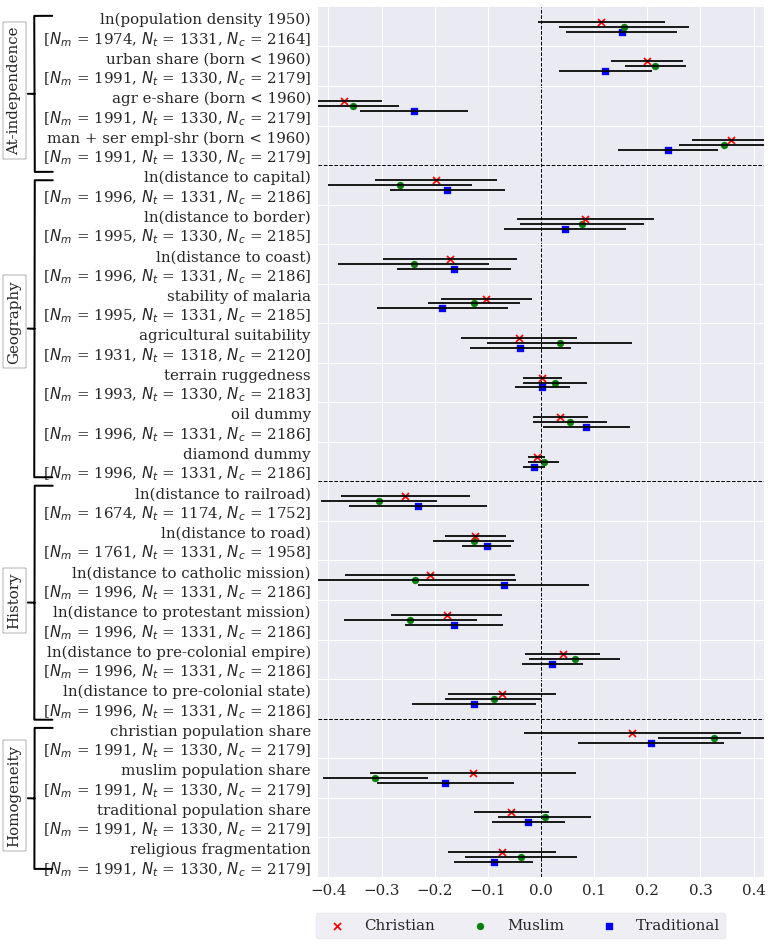

In [9]:
cp = CoefPlot(dfi)
f = cp.grouped_dotplot('b', 'majrel', 'rhs', err='err_t', figsize=(8,16), 
                        order_groups_by_variable='ordr',
                        within_group_order=['Christian', 'Muslim', 'Traditional'],
                        zero_line=True, group_separators=True,
                        legend=True, legend_bbox=(-0.02,-0.08), legend_columns=3)
ax = f.axes[0]

brack1 = ax.annotate('At-independence', xy=(-0.63, 0.9), xytext=(-0.68, 0.83), 
                 xycoords='axes fraction', 
                 textcoords='axes fraction', 
                 fontsize=15, ha='center', va='bottom',
                 bbox=dict(boxstyle='square', fc='white', ec='black'),
                 arrowprops=dict(arrowstyle='-[, widthB=5.2, lengthB=1.2,angleB=1.2',
                                 connectionstyle="arc,angleA=0,angleB=-181,armA=0,armB=30,rad=0",
                                 lw=2.0, color='black'))

brack2 = ax.annotate('Geography', xy=(-0.63, 0.63), xytext=(-0.68, 0.59), 
                 xycoords='axes fraction', 
                 textcoords='axes fraction', 
                 fontsize=15, ha='center', va='bottom',
                 bbox=dict(boxstyle='square', fc='white', ec='black'),
                 arrowprops=dict(arrowstyle='-[, widthB=9.9, lengthB=1.2,angleB=1.2',
                                 connectionstyle="arc,angleA=0,angleB=-181.3,armA=0,armB=30,rad=0",
                                 lw=2.0, color='black'))

brack3 = ax.annotate('History', xy=(-0.63, 0.315), xytext=(-0.68, 0.285), 
                 xycoords='axes fraction', 
                 textcoords='axes fraction', 
                 fontsize=15, ha='center', va='bottom',
                 bbox=dict(boxstyle='square', fc='white', ec='black'),
                 arrowprops=dict(arrowstyle='-[, widthB=7.8, lengthB=1.2,angleB=1.2',
                                 connectionstyle="arc,angleA=0,angleB=-181.3,armA=0,armB=30,rad=0",
                                 lw=2.0, color='black'))

brack4 = ax.annotate('Homogeneity', xy=(-0.63, 0.09), xytext=(-0.68, 0.035), 
                 xycoords='axes fraction', 
                 textcoords='axes fraction', 
                 fontsize=15, ha='center', va='bottom',
                 bbox=dict(boxstyle='square', fc='white', ec='black'),
                 arrowprops=dict(arrowstyle='-[, widthB=4.7, lengthB=1.2,angleB=1.2',
                                 connectionstyle="arc,angleA=0,angleB=-181.3,armA=0,armB=30,rad=0",
                                 lw=2.0, color='black'))

ax.axhline(y=7, linestyle='--', color='black', linewidth=1)
ax.axhline(y=19, linestyle='--', color='black', linewidth=1)
ax.axhline(y=35, linestyle='--', color='black', linewidth=1)

ax.set_xlim([-0.42, 0.42])

brack1.set_rotation(90)
brack2.set_rotation(90)
brack3.set_rotation(90)
brack4.set_rotation(90)

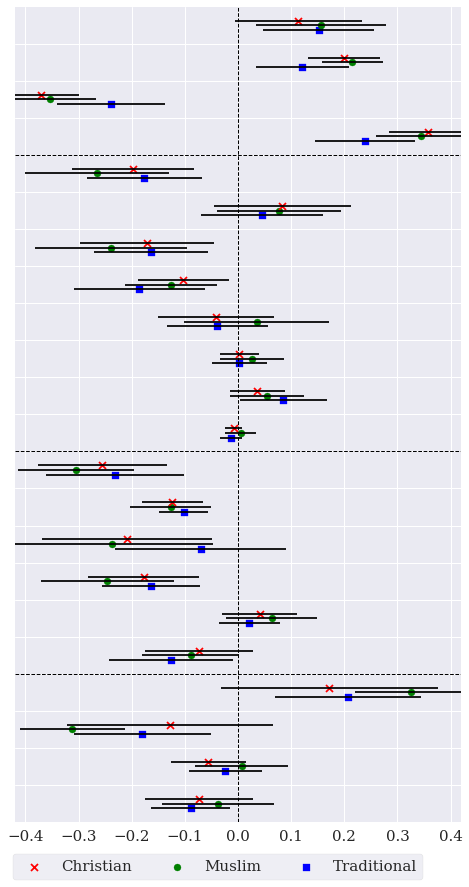

In [10]:
cp = CoefPlot(dfi)
f = cp.grouped_dotplot('b', 'majrel', 'rhs', err='err_t', figsize=(8,15), 
                        order_groups_by_variable='ordr',
                        within_group_order=['Christian', 'Muslim', 'Traditional'],
                        zero_line=True, group_separators=True,
                        legend=True, legend_bbox=(-0.02,-0.08), legend_columns=3)

ax = f.axes[0]
ax.set_yticklabels(['']*len(list(pd.unique(dfi.ordr))), fontdict={'fontsize': 15}, rotation=0, minor=False)

ax.axhline(y=7, linestyle='--', color='black', linewidth=1)
ax.axhline(y=19, linestyle='--', color='black', linewidth=1)
ax.axhline(y=35, linestyle='--', color='black', linewidth=1)

ax.set_xlim([-0.42, 0.42])

plt.show()

In [11]:
df.head(10)

,majrel,min10,direction,lito,b,se,N,rhs,grouping,ordr,err_t,Nc,Nm,Nt
0,Christian,no,down,no,-0.045563,0.016466,2039,"oil dummy\n [$N_m$ = 1867, $N_t$ = 897, $N_c$ ...",geography,11,0.032291,2039,1867,897
1,Christian,no,down,no,0.009153,0.014569,2039,"diamond dummy\n [$N_m$ = 1867, $N_t$ = 897, $N...",geography,12,0.028571,2039,1867,897
2,Christian,no,down,no,0.147499,0.050326,2039,"ln(distance to capital)\n [$N_m$ = 1867, $N_t$...",geography,5,0.098696,2039,1867,897
3,Christian,no,down,no,-0.076681,0.042109,2038,"ln(distance to border)\n [$N_m$ = 1866, $N_t$ ...",geography,6,0.082581,2038,1866,896
4,Christian,no,down,no,0.132807,0.041377,2039,"ln(distance to coast)\n [$N_m$ = 1867, $N_t$ =...",geography,7,0.081146,2039,1867,897
5,Christian,no,down,no,0.046487,0.034055,1973,"agricultural suitability\n [$N_m$ = 1801, $N_t...",geography,9,0.066788,1973,1801,884
6,Christian,no,down,no,0.126807,0.051402,2038,"stability of malaria\n [$N_m$ = 1866, $N_t$ = ...",geography,8,0.100805,2038,1866,897
7,Christian,no,down,no,-0.041735,0.027116,2036,"terrain ruggedness\n [$N_m$ = 1864, $N_t$ = 89...",geography,10,0.053179,2036,1864,896
8,Christian,no,down,no,-0.042934,0.027938,2017,"ln(population density 1950)\n [$N_m$ = 1845, $...",contemporary,1,0.054790,2017,1845,897
9,Christian,no,down,no,0.183782,0.033275,1603,"ln(distance to railroad)\n [$N_m$ = 1504, $N_t...",history,13,0.065266,1603,1504,737


In [12]:
dfi = df[(df.direction == 'up') & 
         (df.lito == 'no') & 
         (df.min10 == 'no')].reset_index(drop=True).copy(deep=True)

In [13]:
df.lito.value_counts()

yes    264
no     264
Name: lito, dtype: int64

In [14]:
for min10 in ['no']:
    for direction in ['up', 'down']:
        for lito in ['yes', 'no']:
            dfi = df[(df.direction == direction) & 
                     (df.lito == lito) & 
                     (df.min10 == min10)].reset_index(drop=True).copy(deep=True)
            
            ########################################################################
            
            cp = CoefPlot(dfi)
            f = cp.grouped_dotplot('b', 'majrel', 'rhs', err='err_t', figsize=(8,16), 
                                    order_groups_by_variable='ordr',
                                                within_group_order=['Christian', 'Muslim', 'Traditional'],
                                                zero_line=True, group_separators=True,
                                    legend=True, legend_bbox=(-0.02,-0.08), legend_columns=3)
            ax = f.axes[0]

            brack1 = ax.annotate('At-independence', xy=(-0.63, 0.9), xytext=(-0.68, 0.83), 
                             xycoords='axes fraction', 
                             textcoords='axes fraction', 
                             fontsize=15, ha='center', va='bottom',
                             bbox=dict(boxstyle='square', fc='white', ec='black'),
                             arrowprops=dict(arrowstyle='-[, widthB=5.2, lengthB=1.2,angleB=1.2',
                                             connectionstyle="arc,angleA=0,angleB=-181,armA=0,armB=30,rad=0",
                                             lw=2.0, color='black'))

            brack2 = ax.annotate('Geography', xy=(-0.63, 0.63), xytext=(-0.68, 0.59), 
                             xycoords='axes fraction', 
                             textcoords='axes fraction', 
                             fontsize=15, ha='center', va='bottom',
                             bbox=dict(boxstyle='square', fc='white', ec='black'),
                             arrowprops=dict(arrowstyle='-[, widthB=9.9, lengthB=1.2,angleB=1.2',
                                             connectionstyle="arc,angleA=0,angleB=-181.3,armA=0,armB=30,rad=0",
                                             lw=2.0, color='black'))

            brack3 = ax.annotate('History', xy=(-0.63, 0.315), xytext=(-0.68, 0.285), 
                             xycoords='axes fraction', 
                             textcoords='axes fraction', 
                             fontsize=15, ha='center', va='bottom',
                             bbox=dict(boxstyle='square', fc='white', ec='black'),
                             arrowprops=dict(arrowstyle='-[, widthB=7.8, lengthB=1.2,angleB=1.2',
                                             connectionstyle="arc,angleA=0,angleB=-181.3,armA=0,armB=30,rad=0",
                                             lw=2.0, color='black'))

            brack4 = ax.annotate('Homogeneity', xy=(-0.63, 0.09), xytext=(-0.68, 0.035), 
                             xycoords='axes fraction', 
                             textcoords='axes fraction', 
                             fontsize=15, ha='center', va='bottom',
                             bbox=dict(boxstyle='square', fc='white', ec='black'),
                             arrowprops=dict(arrowstyle='-[, widthB=4.7, lengthB=1.2,angleB=1.2',
                                             connectionstyle="arc,angleA=0,angleB=-181.3,armA=0,armB=30,rad=0",
                                             lw=2.0, color='black'))

            ax.axhline(y=7, linestyle='--', color='black', linewidth=1)
            ax.axhline(y=19, linestyle='--', color='black', linewidth=1)
            ax.axhline(y=35, linestyle='--', color='black', linewidth=1)

            ax.set_xlim([-0.42, 0.42])

            brack1.set_rotation(90)
            brack2.set_rotation(90)
            brack3.set_rotation(90)
            brack4.set_rotation(90)
            
            if min10 == 'yes':
                min10msg = '_min10'
            else:
                min10msg = ''
                
            if lito == 'yes':
                litomsg = 'withlito'
            else:
                litomsg = 'nolito'
            
            f.savefig('{}/_4_correlates_distlevel_{}_{}{}.pdf'.format(outdir, direction, litomsg, min10msg), bbox_inches='tight', dpi=100)
            plt.close(f)
            
            if direction == 'down':
                cp = CoefPlot(dfi)
                f = cp.grouped_dotplot('b', 'majrel', 'rhs', err='err_t', figsize=(8,15), 
                                        order_groups_by_variable='ordr',
                                        within_group_order=['Christian', 'Muslim', 'Traditional'],
                                        zero_line=True, group_separators=True,
                                        legend=True, legend_bbox=(-0.02,-0.08), legend_columns=3)
                ax = f.axes[0]
                ax.set_yticklabels(['']*len(list(pd.unique(dfi.ordr))), fontdict={'fontsize': 15}, rotation=0, minor=False)
                
                ax.axhline(y=7, linestyle='--', color='black', linewidth=1)
                ax.axhline(y=19, linestyle='--', color='black', linewidth=1)
                ax.axhline(y=35, linestyle='--', color='black', linewidth=1)

                ax.set_xlim([-0.42, 0.42])

                f.savefig('{}/_4_correlates_distlevel_{}_{}{}_nolabels.pdf'.format(outdir, direction, litomsg, min10msg), bbox_inches='tight', dpi=100)
                plt.close(f)
                
                os.remove('{}/_4_correlates_distlevel_{}_{}{}.pdf'.format(outdir, direction, litomsg, min10msg)) 